## Data Exploratory Analysis of Telecom Users Data

## Task 1

### Data Cleaning, Transformations and Feature Extractions.

#### User Overview analysis


## Steps Involved

### Step 1: Importing necessary and initial Packages and Loading Data

In [3]:
# Importing necessary packages for data loading and initial visualizations
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading data 
pd.set_option('max_column', None)
loaded_data = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=['?', None])
loaded_data.head() # Print the head sample of the Data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Displaying the column names

In [5]:
# Showing the number of column and their names
print("The Total Number of Columns are: ",len(loaded_data.columns.tolist())) 
loaded_data.columns.tolist()


The Total Number of Columns are:  55


['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

### Step 2: Showing the Data Metrics

#### Size of the Data, and other related metrics, like Data types of each column

In [6]:
# number of data points
print(f" There are {loaded_data.shape[0]} rows and {loaded_data.shape[1]} columns of Telecom Users Data")
print("Shape of the Data",loaded_data.shape)
print("------------ Data Type of each Column----------------")
print("")
loaded_data.info()

 There are 150001 rows and 55 columns of Telecom Users Data
Shape of the Data (150001, 55)
------------ Data Type of each Column----------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI              

### Step 3: Handling Missing Values

#### Showing the number and percentage of missing Values

In [7]:
# Percentage % of total missing values in the dataset

def total_percent_missing_data(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The Telecom dataset contains a Total of ", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

total_percent_missing_data(loaded_data)

The Telecom dataset contains a Total of  12.5 % missing values.


In [8]:
# Column(s) that has missing values

total_no_data_per_column = loaded_data.shape[0]-1 # Total number of rows in every column
print(" ")

# printing the number of Missing data per column
item_list = []
row_list = []
i=0
for item in loaded_data.columns:
    no_missing_values = loaded_data[item].isna().sum()
    percentage = str(round(((no_missing_values/total_no_data_per_column) * 100), 2))+" %"
    row_list.append(item)
    row_list.append(no_missing_values)
    row_list.append(percentage)
    item_list.append(row_list)
    row_list = []
    

# Table showing statics of missing Values
df = pd.DataFrame(item_list,
                  columns=['Column', 'No. of Missing Values', '% Missing Values per column'])
df.style


,Column,No. of Missing Values,% Missing Values per column
0,Bearer Id,991,0.66 %
1,Start,1,0.0 %
2,Start ms,1,0.0 %
3,End,1,0.0 %
4,End ms,1,0.0 %
5,Dur. (ms),1,0.0 %
6,IMSI,570,0.38 %
7,MSISDN/Number,1066,0.71 %
8,IMEI,572,0.38 %
9,Last Location Name,1153,0.77 %


#### Grouping Columns having missing values less than 10%, 10% - 20%, 20% - 40%,  40% - 50%, and more than 70% of the total data of the column



Number of columns with No missing Values :  26
['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)', 'Total UL (Bytes)', 'Total DL (Bytes)']

Number of columns with missing Values Less than 1%:  17
['Bearer Id', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B', 'Nb

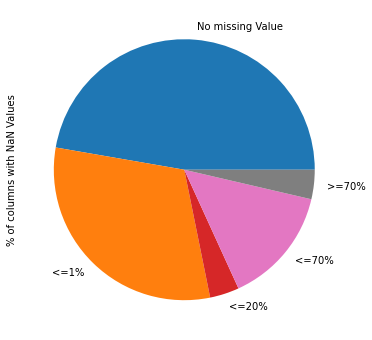

In [9]:
# List to Hold these columns  #### Refactor the Print function
non_missing_list, less_1, less_10, less_20, less_40, less_50, less_70, greater_70 = [],[],[],[],[],[],[],[]
for item in loaded_data.columns:
    no_missing_values = loaded_data[item].isna().sum()
    percentage = round(((no_missing_values/total_no_data_per_column) * 100), 2)
    
    if percentage == 0:
        non_missing_list.append(item)
    if percentage >0 and percentage <= 1:
        less_1.append(item)
    if percentage > 1 and percentage <= 10:
        less_10.append(item)
    if percentage > 10 and percentage <= 20:
        less_20.append(item)
    if percentage > 20 and percentage <= 40:
        less_40.append(item)
    if percentage > 40 and percentage <= 50:
        less_50.append(item)
    if percentage > 50 and percentage <= 70:
        less_70.append(item)
    if percentage > 70:
        greater_70.append(item)

print("Number of columns with No missing Values : ",len(non_missing_list))
print(non_missing_list)
print()
print("Number of columns with missing Values Less than 1%: ",len(less_1))
print(less_1)
print()
print("Number of columns with missing Values Less than 10%: ",len(less_10))
print(less_10)
print()
print("Number of columns with missing Values Less than 20%: ",len(less_20))
print(less_20)
print()
print("Number of columns with missing Values Less than 40%: ",len(less_40))
print(less_40)
print()
print("Number of columns with missing Values Less than 50%: ",len(less_50))
print(less_50)
print()
print("Number of columns with missing Values Less than 70%: ",len(less_70))
print(less_70)
print()
print("Number of columns with missing Values Greater than or eaqual to 70%: ",len(greater_70))
print(greater_70)
print()
# ploting the Missing Data by Groups
print("Ploting the Missing Data by Groups")

series = pd.Series([len(non_missing_list), len(less_1),len(less_10),len(less_20), 
                    len(less_40), len(less_50), len(less_70), 
                    len(greater_70)], 
                   index=["No missing Value","<=1%", "<=10%", "<=20%", "<=40%","<=50%","<=70%",">=70%"], name="% of columns with NaN Values")

series.plot.pie(figsize=(6, 6));

### Droping columns with more than 25-30% missing Values

From Above analytics, these Columns are: 
- 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol UL < 37500B'


In [25]:
# Column dropiing function
def drop_column(list_to_be_droped):
    processed_data = loaded_data.drop(list_to_be_droped, 
                      axis=1)
    return processed_data


# Prepare a list of columns to be droped and pass to the Function
list_droped = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 
               'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B',
               'Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 6250B < Vol DL < 31250B',
               'Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol UL < 37500B']

processed_data = drop_column(list_droped)
print("Size of Data Left: ",processed_data.shape)
processed_data.head()

Size of Data Left:  (150001, 45)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


### Filling or Droping Rows of Missing Values

#### Columns to be Considered

In [26]:
# Columns to be Considered
less_1, less_20

(['Bearer Id',
  'IMSI',
  'MSISDN/Number',
  'IMEI',
  'Last Location Name',
  'DL TP < 50 Kbps (%)',
  '50 Kbps < DL TP < 250 Kbps (%)',
  '250 Kbps < DL TP < 1 Mbps (%)',
  'DL TP > 1 Mbps (%)',
  'UL TP < 10 Kbps (%)',
  '10 Kbps < UL TP < 50 Kbps (%)',
  '50 Kbps < UL TP < 300 Kbps (%)',
  'UL TP > 300 Kbps (%)',
  'Handset Manufacturer',
  'Handset Type',
  'Nb of sec with Vol DL < 6250B',
  'Nb of sec with Vol UL < 1250B'],
 ['Avg RTT DL (ms)', 'Avg RTT UL (ms)'])

#### Filling Values in Discrete and Categoric data columns

For Discrete, and Categoric data, I will use Mode Filling method! This will be done because the columns 
are discrete and Categoric, therefore, we'll make assumptions that the missing values are those with 
highest frequency/occurence *******

These columns are ['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer',
  'Handset Type']

In [32]:
# Filling Discrete and Categorical data Columns with Modes

def Mode_filling(data, column_list):
    for column in column_list:
        data[column] = data[column].fillna(data[column].mode()[0])
        
    return data

# Fill 'Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name' columns with mode 
column_list_mode_fill = ['Bearer Id','IMSI','MSISDN/Number','IMEI','Last Location Name','Handset Manufacturer',
  'Handset Type']

processed_data = Mode_filling(processed_data, column_list_mode_fill)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 122172 non-null  float64
 11  Avg RTT UL (ms)                 122189 non-null  float64
 12  Avg Bearer TP DL

#### Filling Values in Continuous data columns

For Continuous data, I will use k-NN (k nearest neighbours) method to fill missing values! k-NN is chosen to fill missing values, by using close/neighbor related data,and this assumed that, if a number of parameters are almost the same, therefore, these might be doing the same activities on the Internet, for example, streaming videos on youtube or playing games, etc.*******

These columns are ['DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B','Avg RTT DL (ms)', 'Avg RTT UL (ms)']

In [40]:
# Using k-NN Method to fill missing Continuous values for columns shown above

from sklearn.impute import KNNImputer

def knn_fix_missing_value(data, colum_list):
    for column in colum_list:
        imputer = KNNImputer(n_neighbors = 5, weights='uniform', metric='nan_euclidean')
        data[column] = imputer.fit_transform(data[[column]])
        
    
    return data


missing_columns = ['DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 
                   'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', 
                   '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B', 
                   'Nb of sec with Vol UL < 1250B','Avg RTT DL (ms)', 'Avg RTT UL (ms)']

processed_data = knn_fix_missing_value(processed_data, missing_columns)

processed_data.info()

In [48]:
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       150001 non-null  float64
 1   Start                           150000 non-null  object 
 2   Start ms                        150000 non-null  float64
 3   End                             150000 non-null  object 
 4   End ms                          150000 non-null  float64
 5   Dur. (ms)                       150000 non-null  float64
 6   IMSI                            150001 non-null  float64
 7   MSISDN/Number                   150001 non-null  float64
 8   IMEI                            150001 non-null  float64
 9   Last Location Name              150001 non-null  object 
 10  Avg RTT DL (ms)                 150001 non-null  float64
 11  Avg RTT UL (ms)                 150001 non-null  float64
 12  Avg Bearer TP DL

###  Task 1 Data Exploratory

*   detection of mistakes, outliers or abnormalities
*   determining relationships among the explanatory variables
*   assessing the relationships between explanatory and outcome variables

For Task1, the following columns will be selected for explorations; 'Total UL (Bytes)', 'Total DL (Bytes)', 'Dur. (ms)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)'.

In [59]:
# Descriptions of the Columns Statistics

processed_data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150000.000000,150000.000000,1.500000e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150000.000000,150000.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,150001.000000,1.500000e+05,1.500000e+05,1.500000e+05,150001.000000,150001.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.015806e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.182414e+10,4.842386e+13,109.795706,17.662883,13300.045927,1770.428647,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.829177e+06,1.408880e+06,1.046091e+08,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893178e+18,288.611834,288.097653,8.103762e+04,2.144723e+10,2.438731e+12,2.238859e+13,559.342620,76.529933,23971.878541,4625.355500,13.005221,6.199592,4.149070,4.816738,4.622035,3.216651,1.620229,1.291972,5.696395e+06,4.643231e+06,8.103761e+07,9148.498009,10133.431600,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365094e+10,3.544691e+13,35.000000,3.000000,43.000000,47.000000,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.487775e+04,2.153975e+04,5.744079e+07,88.000000,107.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366361e+10,3.572151e+13,54.000000,7.000000,63.000000,63.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,3.930450e+04,4.679350e+04,8.639998e+07,205.000000,220.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368307e+10,8.611970e+13,109.795706,17.662883,19710.750000,1120.000000,100.000000,4.000000,1.000000,1.000000,100.000000,0.000000,0.000000,0.000000,6.796095e+05,5.990952e+05,1.324308e+08,2765.000000,2560.000000,2.694938e+06,49334.000000,8.623552e+06,3.088454

In [56]:
# Plot functionsto show outliers and abnomalities

################### PLOTTING FUNCTIONS #####################

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column, color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()
def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()


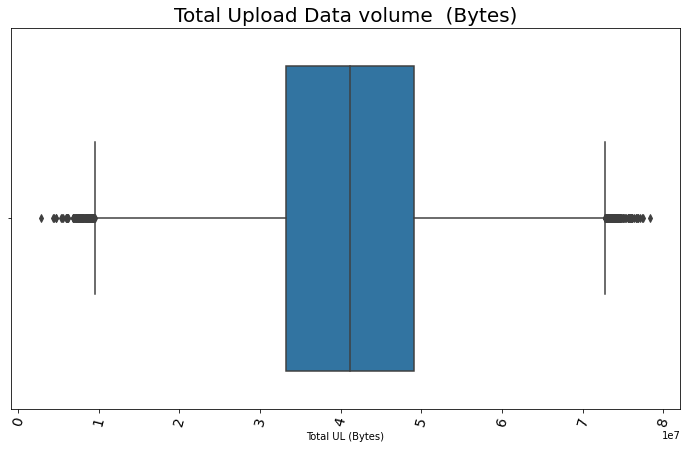

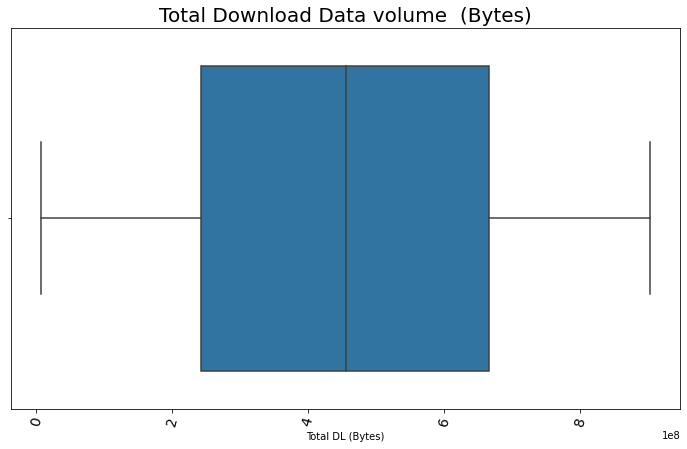

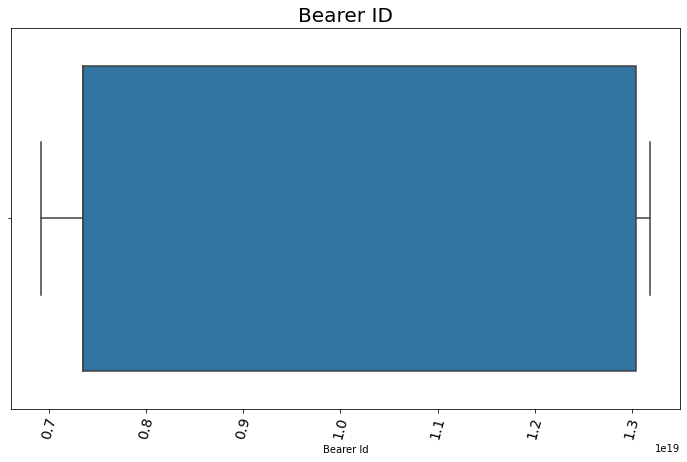

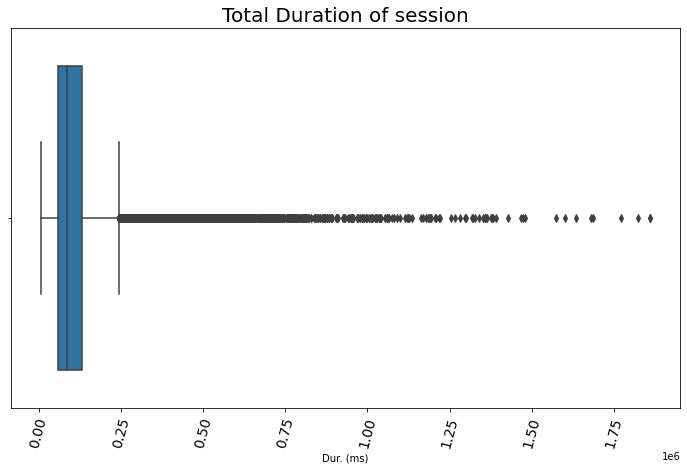

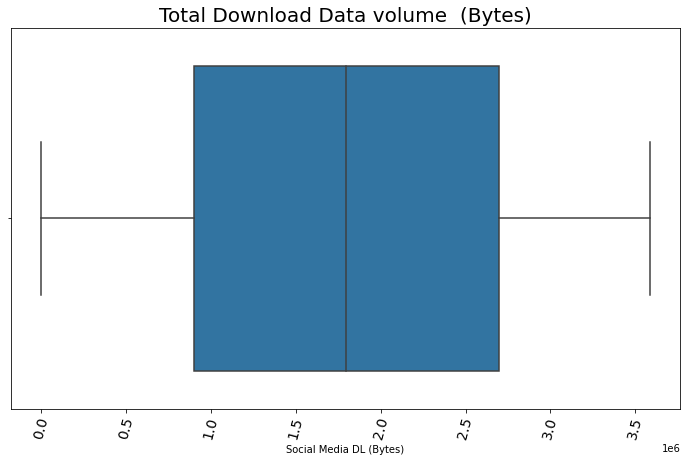

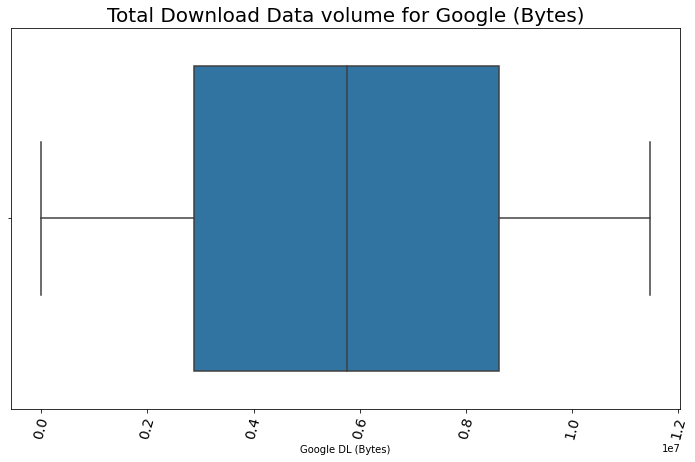

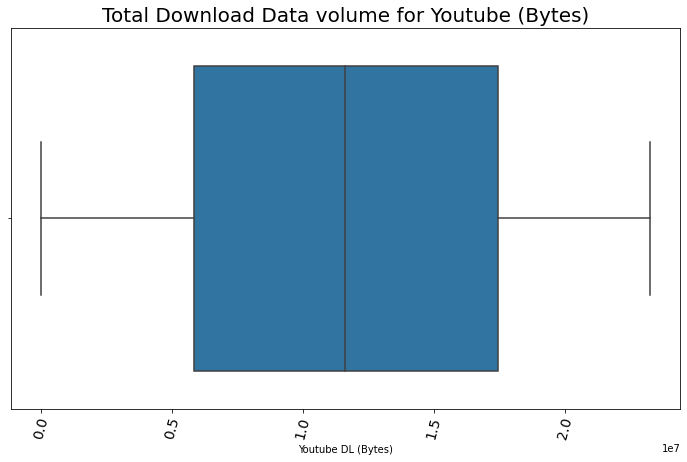

In [218]:
# Showing Outliers of Some columns

plot_box(processed_data, "Total UL (Bytes)", "Total Upload Data volume  (Bytes)")
plot_box(processed_data, "Total DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Bearer Id", "Bearer ID")
plot_box(processed_data, "Dur. (ms)", "Total Duration of session")

plot_box(processed_data, "Social Media DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Google DL (Bytes)", "Total Download Data volume for Google (Bytes)")
plot_box(processed_data, "Youtube DL (Bytes)", "Total Download Data volume for Youtube (Bytes)")

## Transforming Data ***TO BE CONTINUED

**Scaling and Normalization**

### TASK 1 OVERVIEW

### Task 1.0 

### Top 10 Handsets, and Top 3 Handset Manufacturers used by the Customers

In [111]:
# Using  Handset Type and Handset Manufacturer

def high_frequency_category(data, column):
    list_Of_Handset_In_Column=list(data[column].value_counts().index)
    top_category_column = data[column].value_counts()
    
    return list_Of_Handset_In_Column, top_category_column

list_Of_Handset_type, top_Handset_type = high_frequency_category(processed_data, "Handset Type")
list_Of_Handset_manufact, top_Handset_manufact = high_frequency_category(processed_data, "Handset Manufacturer")

print("List_Of_Handset_type")
print(list_Of_Handset_type[:15])
print("")
print("List_Of_Handset_Manufacturer")
print(list_Of_Handset_manufact[:15])
print("")

print("List_Of_Top10_Handset_type")
print(top_Handset_type[:10])
print("")
print("List_Of_Top3_Handset_Manufacturer")
print(top_Handset_manufact[:3])

List_Of_Handset_type
['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined', 'Apple iPhone 7 (A1778)', 'Apple iPhone Se (A1723)', 'Apple iPhone 8 (A1905)', 'Apple iPhone Xr (A2105)', 'Samsung Galaxy S8 (Sm-G950F)', 'Apple iPhone X (A1901)', 'Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)', 'Samsung Galaxy J3 (Sm-J330)', 'Samsung Galaxy S7 (Sm-G930X)', 'Apple iPhone 8 Plus (A1897)']

List_Of_Handset_Manufacturer
['Apple', 'Samsung', 'Huawei', 'undefined', 'Sony Mobile Communications Ab', 'Wiko Global Sasu', 'Xiaomi Communications Co Ltd', 'Oneplus Technology (Shenzhen) Co Ltd', 'Asustek', 'Lenovo', 'Tcl Communication Ltd', 'Crosscall', 'Zte', 'Microsoft Mobile Oy', 'Htc']

List_Of_Top10_Handset_type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)

### ........................................

### Results: 
#### Top 10 Handset with their occurence in "{}" brackets 
1. Huawei B528S-23A  {20324}, 
2. Apple iPhone 6S (A1688) {9419}, 
3. Apple iPhone 6 (A1586)  {9023}, 
4. undefined {8987}, 
5. Apple iPhone 7 (A1778)  {6326},  
6. Apple iPhone Se (A1723)  {5187}, 
7. Apple iPhone 8 (A1905)  {4993}, 
8. Apple iPhone Xr (A2105) 4568
9. Samsung Galaxy S8 (Sm-G950F) 4520
10. Apple iPhone X (A1901)  {3813} 

#### Top 3 Handset Manufacturers with their occurence in "{}" brackets 

1. Apple {60137}
2. Samsung {40839}
3. Huawei {34423}

In [141]:
print("List_Of_Top5_Handset_type per Top3 Handset_Manufacturer")
print("")
handset_list = list(top_Handset_type[:5].index)

print(handset_list)
print("")
print("Handset per Handset_Manufacturer")
list_hand_manuf = []
def clomn_per_refcolumn(data, refer_colum, column, column_to_find):
    for value in refer_colum:
        a = data.loc[data[column] == value, column_to_find][:1]
        list_hand_manuf.append(a)
    return list_hand_manuf

a = clomn_per_refcolumn(processed_data, handset_list, "Handset Type", "Handset Manufacturer")
print(a[:5])

List_Of_Top5_Handset_type per Top3 Handset_Manufacturer

['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined', 'Apple iPhone 7 (A1778)']

Handset per Handset_Manufacturer
[43    Huawei
Name: Handset Manufacturer, dtype: object, 22    Apple
Name: Handset Manufacturer, dtype: object, 71    Apple
Name: Handset Manufacturer, dtype: object, 3    undefined
Name: Handset Manufacturer, dtype: object, 57    Apple
Name: Handset Manufacturer, dtype: object]


#### Top 5 Handset  per Top 3 Handset Manufacturers

Handset: 
['Huawei B528S-23A', 'Apple iPhone 6S (A1688)', 'Apple iPhone 6 (A1586)', 'undefined', 'Apple iPhone 7 (A1778)']
Handset per Handset_Manufacturer:
[Huawei, Apple, undefined]

### Task 1.1

### User Behaviours

#### Removing Outliers for Columns that will be used for Task 1

In [227]:
# Removing Outliers for Columns used in Task 1

def fix_outlier(data, column_list):
    for column in column_list:
        data[column] = np.where(data[column] > data[column].quantile(0.95), data[column].median(),data[column])
    
    return data

In [231]:
list_of_columns = ['Dur. (ms)','Total DL (Bytes)','Total UL (Bytes)', 'Social Media DL (Bytes)', 
                   'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 
                   'Email UL (Bytes)', 'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 
                   'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

processed_data = fix_outlier(processed_data, list_of_columns)


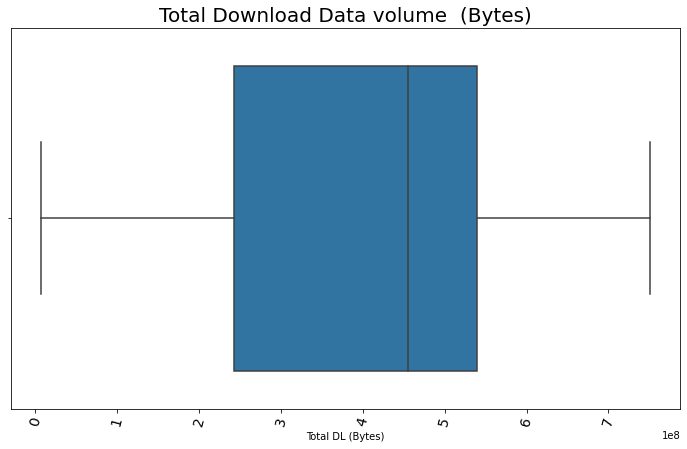

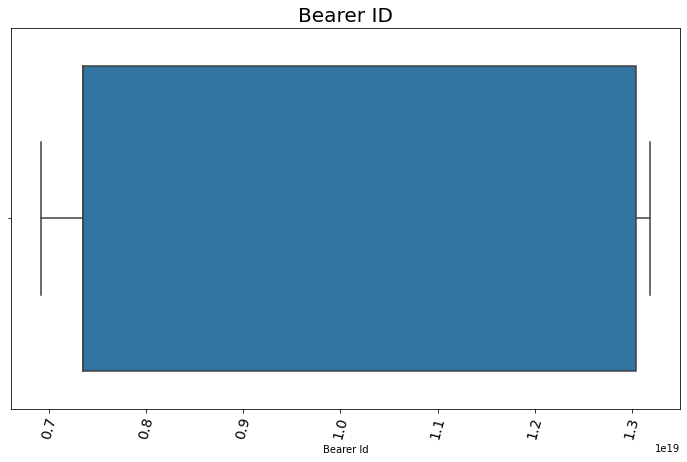

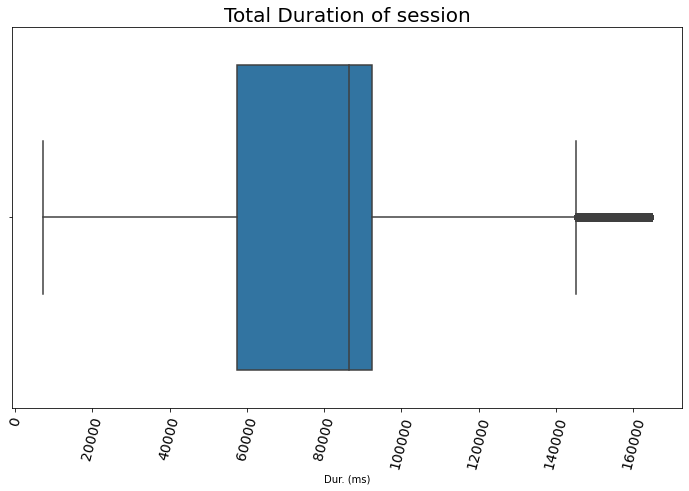

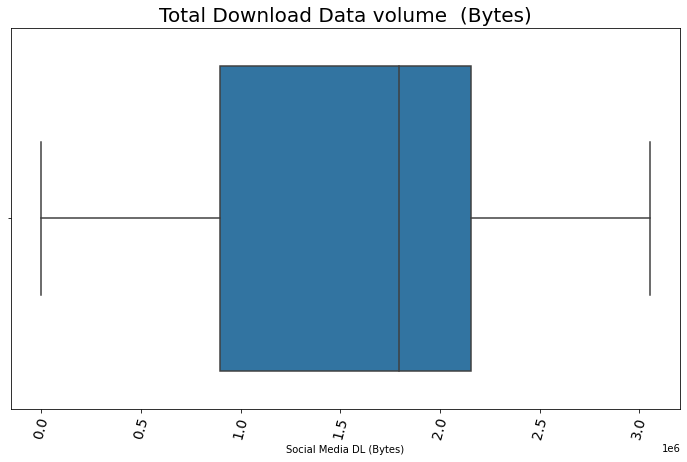

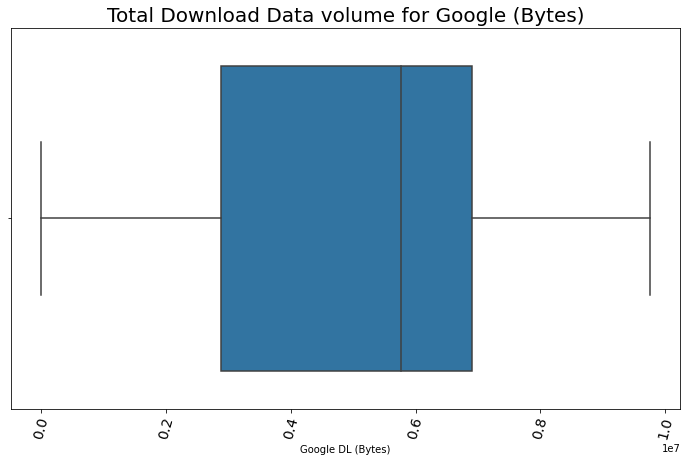

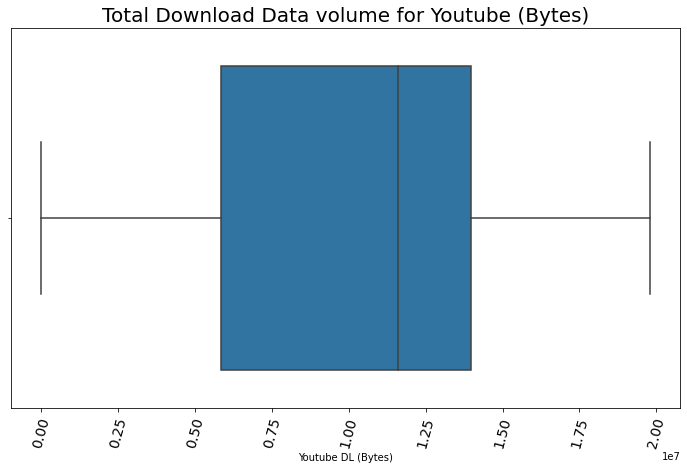

In [233]:
# Showing Outliers if any after Removing them

plot_box(processed_data, "Total DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Bearer Id", "Bearer ID")
plot_box(processed_data, "Dur. (ms)", "Total Duration of session")

plot_box(processed_data, "Social Media DL (Bytes)", "Total Download Data volume  (Bytes)")
plot_box(processed_data, "Google DL (Bytes)", "Total Download Data volume for Google (Bytes)")
plot_box(processed_data, "Youtube DL (Bytes)", "Total Download Data volume for Youtube (Bytes)")

#### Aggregating columns data per user 
1. Aggregating per number of xDR sessions


In [234]:
# Function to Aggregate user data

def aggregate_func(data, ref_column, agg_column, param_list):
    User_per_xDR_Sessions = data.groupby(ref_column).agg({agg_column: param_list})
                                                                                               
    
    return User_per_xDR_Sessions

# Using MSISDN/Number column to Identify User, and Bearer Id as Session identifiers
list_m = ['count']
User_per_xDR_Sessions = aggregate_func(processed_data,'MSISDN/Number','Bearer Id',list_m)

# processed_data.plot(x='MSISDN/Number', y='Bearer Id', kind='hist')
print(User_per_xDR_Sessions.sample(5))

              Bearer Id
                  count
MSISDN/Number          
3.376157e+10          1
3.377739e+10          1
3.376091e+10          1
3.366691e+10          1
3.366491e+10          1


#### Aggregating columns data per user 
2. Aggregating per Session duration


In [236]:
# Session duration
list_m = ['count','sum','mean', 'min', 'max']
User_per_Duration = aggregate_func(processed_data,'MSISDN/Number','Dur. (ms)',list_m)
print(User_per_Duration.sample(5))

              Dur. (ms)                                        
                  count       sum      mean       min       max
MSISDN/Number                                                  
3.366492e+10          2  172798.0   86399.0   86399.0   86399.0
3.365034e+10          1   16762.0   16762.0   16762.0   16762.0
3.376047e+10          1   86399.0   86399.0   86399.0   86399.0
3.365088e+10          1  118963.0  118963.0  118963.0  118963.0
3.368657e+10          1   28955.0   28955.0   28955.0   28955.0


#### Aggregating columns data per user 
3. Aggregating per total download (DL) and upload (UL) data


In [237]:
# total download (DL) data
list_m = ['count','sum','mean', 'min', 'max']
User_per_total_DL = aggregate_func(processed_data,'MSISDN/Number','Total DL (Bytes)',list_m)

# total upload (UL) data
list_m = ['count','sum','mean', 'min', 'max']
User_per_total_UL = aggregate_func(processed_data,'MSISDN/Number','Total UL (Bytes)',list_m)

print(User_per_total_DL.sample(5))
print(User_per_total_UL.sample(5))

              Total DL (Bytes)                                         \
                         count          sum         mean          min   
MSISDN/Number                                                           
3.365814e+10                 1  455841077.5  455841077.5  455841077.5   
3.365924e+10                 1  726721159.0  726721159.0  726721159.0   
3.366417e+10                 1  308055922.0  308055922.0  308055922.0   
3.366862e+10                 1   83206395.0   83206395.0   83206395.0   
3.360557e+10                 1  114195502.0  114195502.0  114195502.0   

                            
                       max  
MSISDN/Number               
3.365814e+10   455841077.5  
3.365924e+10   726721159.0  
3.366417e+10   308055922.0  
3.366862e+10    83206395.0  
3.360557e+10   114195502.0  
              Total UL (Bytes)                                                
                         count         sum        mean         min         max
MSISDN/Number            

#### Aggregating columns data per user 
4. Aggregating per total data volume (in Bytes) during this session for each application
> 'Social Media DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google DL (Bytes)',
 'Google UL (Bytes)',
 'Email DL (Bytes)',
 'Email UL (Bytes)',
 'Youtube DL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix DL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming DL (Bytes)',
 'Gaming UL (Bytes)',

In [238]:
# total Social Media upload (UL) and DL data per app

def app_aggregate_func(data, ref_column, app):
    User_per_xDR_Sessions = data.groupby(ref_column).agg(app)
    
    return User_per_xDR_Sessions

list_m = ['sum']
application = {'Social Media DL (Bytes)': list_m, 'Social Media UL (Bytes)': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.sample(5))

              Social Media DL (Bytes) Social Media UL (Bytes)
                                  sum                     sum
MSISDN/Number                                                
3.366322e+10               10547876.0                155918.0
3.369882e+10                 999082.0                 25183.0
3.366129e+10                2521817.0                 46679.0
3.366088e+10                1380294.0                 43116.0
3.368272e+10                 891480.0                 19027.0


In [239]:
# total Google upload (UL) and DL data per app
list_m = ['sum']
application = {'Google DL (Bytes)': list_m, 'Google UL (Bytes)': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.sample(5))

              Google DL (Bytes) Google UL (Bytes)
                            sum               sum
MSISDN/Number                                    
3.365975e+10          6274597.0         2329635.0
3.360100e+10          4197697.0         1137166.0
3.366653e+10           466392.0         2711158.0
3.366850e+10          5765829.0         3009150.0
3.369518e+10         13881921.0         3574454.0


In [240]:
# total Email upload (UL) and DL data per app
list_m = ['sum']
application = {'Email DL (Bytes)': list_m, 'Email UL (Bytes)': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.sample(5))

              Email DL (Bytes) Email UL (Bytes)
                           sum              sum
MSISDN/Number                                  
3.368683e+10         2582043.0          78602.0
3.363193e+10         2330402.0         696064.0
3.366566e+10         2650965.0         222049.0
3.369868e+10         2562502.0         776222.0
3.365869e+10         1262310.0         180840.0


In [241]:
# total Youtube upload (UL) and DL data per app
list_m = ['sum']
application = {'Youtube DL (Bytes)': list_m, 'Youtube UL (Bytes)': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.sample(5))

              Youtube DL (Bytes) Youtube UL (Bytes)
                             sum                sum
MSISDN/Number                                      
3.363331e+10           6845768.0         11220614.0
3.365905e+10           9111247.0          8360374.0
3.367554e+10          19058361.0          3231453.0
3.365925e+10          19016784.0         16559074.0
3.360922e+10          11616019.0         11013447.0


In [242]:
# total Netflix upload (UL) and DL data per app
list_m = ['sum']
application = {'Netflix DL (Bytes)': list_m, 'Netflix UL (Bytes)': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.sample(5))

              Netflix DL (Bytes) Netflix UL (Bytes)
                             sum                sum
MSISDN/Number                                      
3.376882e+10           1823664.0         14591130.0
3.366604e+10          14393202.0         10996384.0
3.364111e+10          11642217.0          7663611.0
3.367858e+10          15625217.0          1138418.0
3.366627e+10          11642217.0          5277082.0


In [243]:
# total Gaming upload (UL) and DL data per app
list_m = ['sum']
application = {'Gaming DL (Bytes)': list_m, 'Gaming UL (Bytes)': list_m}
User_per_total_DUL = app_aggregate_func(processed_data,'MSISDN/Number', application)

print(User_per_total_DUL.sample(5))

              Gaming DL (Bytes) Gaming UL (Bytes)
                            sum               sum
MSISDN/Number                                    
3.361030e+10        423408104.0        12477400.0
3.366132e+10        718750575.0        22544974.0
3.363469e+10        239469553.0        11439825.0
3.361438e+10        263878253.0        12390292.0
3.376738e+10         39591434.0        13499394.0


### Task 1.2

### EDA

#### Aggregating columns data per user 
1. Aggregating per number of xDR sessions